# Forecasting

In [1]:
%load_ext autoreload
%autoreload 2

import pysm
from fgbuster.observation_helpers import get_instrument, get_sky
import healpy as hp
import numpy as np
from fgbuster import xForecast, CMB, Dust, Synchrotron

nside = 64
# define sky and foregrounds simulations
sky = pysm.Sky(get_sky(nside, 'd0s0'))
# define instrument
instrument = pysm.Instrument(get_instrument('cmbs4', nside))
# get noiseless frequency maps
freq_maps = instrument.observe(sky, write_outputs=False)[0]
# take only the Q and U maps
freq_maps = freq_maps[:,1:]

/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0020.00 | 16.66 | 13.60 | 00.00 
0030.00 | 10.62 | 08.67 | 00.00 
0040.00 | 10.07 | 08.22 | 00.00 
0085.00 | 02.01 | 01.64 | 00.00 
0095.00 | 01.59 | 01.30 | 00.00 
0145.00 | 04.53 | 02.03 | 00.00 
0155.00 | 04.53 | 02.03 | 00.00 
0220.00 | 11.61 | 05.19 | 00.00 
0270.00 | 15.84 | 07.08 | 00.00 
Instrument attribute 'pixel_indices' not set.


In [2]:
# create 3% circular sky mask
RA = 2*np.pi-70.*np.pi/180
DEC = np.pi/2+70.*np.pi/180
radius = 34*np.pi/180
mask_circular = np.zeros(12*nside**2)
for ipix in range(12*nside**2):
    theta, phi = hp.pix2ang(nside, ipix)
    if (((phi - RA)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
    if (((phi - RA+2*np.pi)**2 + (theta - DEC)**2 <= radius**2)):
        mask_circular[ipix] = 1.0
# applying mask to observed frequency maps
freq_maps[...,mask_circular==0] = 0.0

In [3]:
# define components used in the modeling
components = [CMB(), Dust(150.), Synchrotron(150.)]

fsky =  0.030192057291666668
======= ESTIMATION OF SPECTRAL PARAMETERS =======
res.x =  [ 1.54 20.   -3.  ]
======= ESTIMATION OF NOISE AFTER COMP SEP =======
======= COMPUTATION OF CL_FGS =======


======= ESTIMATION OF STAT AND SYS RESIDUALS =======
======= OPTIMIZATION OF COSMO LIKELIHOOD =======


bounds on r =  0.0009862521794868784  /  0.0010328281259410286
starting point =  0.0010092715146305707
    ===>> fitted r =  [0.00099999]
======= ESTIMATION OF SIGMA(R) =======


ind_sr_min =  1
sr_grid[ind_sr_min-1] =  [0.00099999]
sr_grid[ind_sr_min+1] =  [0.00177827]
sr_grid =  [[9.99994886e-04]
 [1.33351490e-03]
 [1.77827107e-03]
 [2.37136309e-03]
 [3.16226418e-03]
 [4.21694796e-03]
 [5.62339168e-03]
 [7.49891493e-03]
 [9.99996591e-03]
 [1.33351717e-02]
 [1.77827411e-02]
 [2.37136714e-02]
 [3.16226957e-02]
 [4.21695515e-02]
 [5.62340127e-02]
 [7.49892771e-02]
 [9.99998295e-02]
 [1.33351944e-01]
 [1.77827714e-01]
 [2.37137118e-01]
 [3.16227496e-01]
 [4.21696234e-01]
 [5.62341086e-01]
 [7.49894050e-01]
 [1.00000000e+00]]
case # 3
bounds on sigma(r) =  [0.00099999]  /  [0.00177827]
starting point =  [0.00133351]


    ===>> sigma(r) =  [0.00030872]
======= GRIDDING COSMO LIKELIHOOD =======


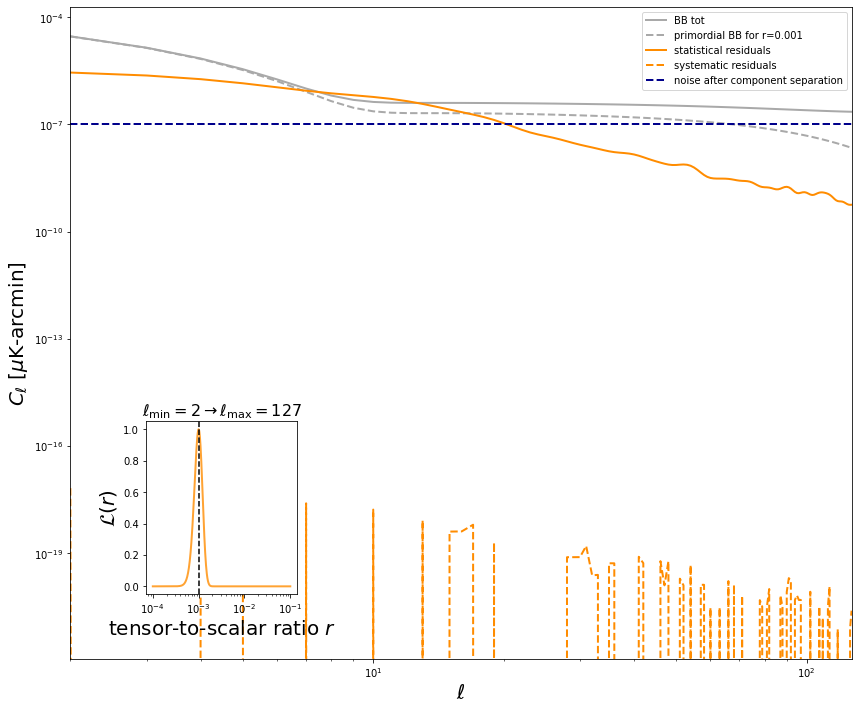

In [4]:
# call for xForecast
# with lmin=2, lmax=2*nside-1, and Alens=0.1
# you can try with make_figure=True if you want to output angular power spectra and profile likelihood on r
res = xForecast(components, instrument, freq_maps, 2, 2*nside-1, Alens=0.1, r=0.001, make_figure=True)